# Morphological Image Processing

Morphological operations transform images based on shape; typically we mean binary images in this context.

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import filters

## Kernels, footprints and structural elements

If we work with scikit-image, many morphological filters have a `footprint` parameter. This footprint is the filter kernel, and in the literature you also find the term `structural element` for this.

In [2]:
disk = morphology.disk(3) # creates a disk of 1 with radius = 3
disk

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

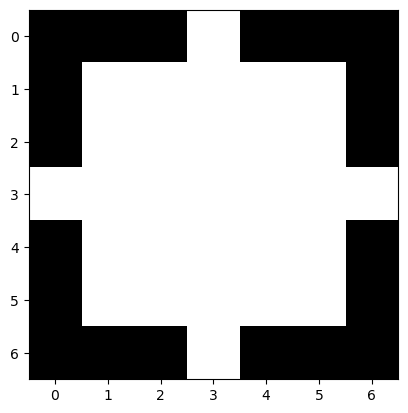

In [3]:
plt.imshow(disk, cmap='gray')

In [4]:
square = morphology.square(3) # creates a square with width and height = 3
square

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

## Binary morphology

For demonstrating morphological filtering of binary images, we use the small nuclei image again.

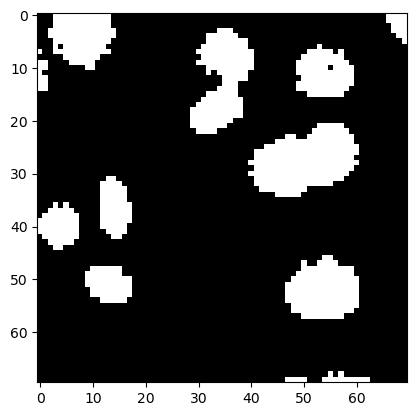

In [5]:
image_nuclei = imread('data/mitosis_mod.tif').astype(float)
image_binary = image_nuclei > filters.threshold_otsu(image_nuclei)

plt.imshow(image_binary, cmap='gray')

## Erosion and Dilation
To make white islands in the black ocean smaller, we need to _erode_ its coastlines.

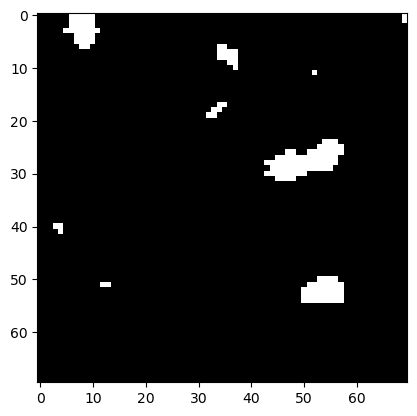

In [6]:
eroded = morphology.binary_erosion(image_binary, disk)

plt.imshow(eroded, cmap='gray')

If we dilate the image afterwards, we get white islands back that look smoother than in the original binary image.

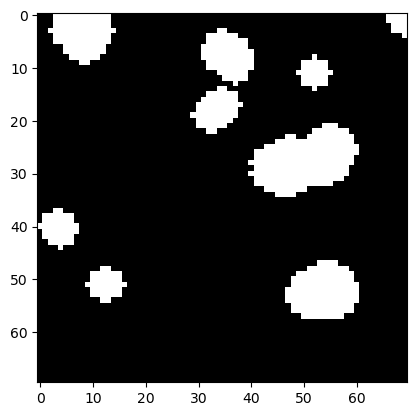

In [7]:
eroded_dilated = morphology.binary_dilation(eroded, disk)

plt.imshow(eroded_dilated, cmap='gray')

Calling erosion and dilation subsequently is so common that there is an extra function which does exactly that. As the gap between islands _open_ the operation is called _opening_.

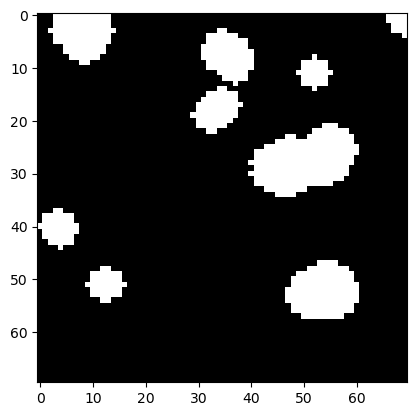

In [8]:
opened = morphology.binary_opening(image_binary, disk)

plt.imshow(opened, cmap='gray')

# Exercise 1
There is also a _closing_ operation. Apply it to the binary image.

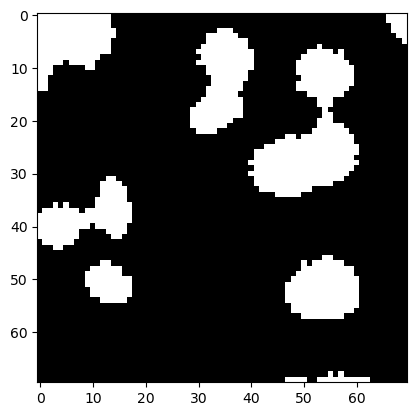

In [11]:
closed = morphology.binary_closing(image_binary, disk)

plt.imshow(closed, cmap='gray')

# Exercise 2
Search the [scikit-image documentation](https://scikit-image.org/) for minimum and maximum filters. Apply the minimum filter to the binary image and the maximum filter to the result afterwards. Compare it to the images shown above.

c:\Users\albertds\mambaforge\envs\napari-devbio\lib\site-packages\IPython\core\interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\albertds\mambaforge\envs\napari-devbio\lib\site-packages\skimage\util\dtype.py:550: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


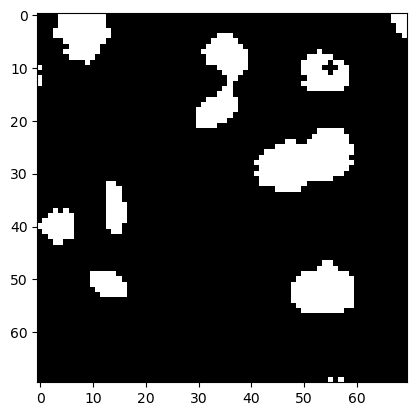

In [32]:
minimum = filters.rank.minimum(image_binary.astype(int), morphology.disk(1))
plt.imshow(minimum, cmap='gray')

c:\Users\albertds\mambaforge\envs\napari-devbio\lib\site-packages\IPython\core\interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\albertds\mambaforge\envs\napari-devbio\lib\site-packages\skimage\util\dtype.py:550: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


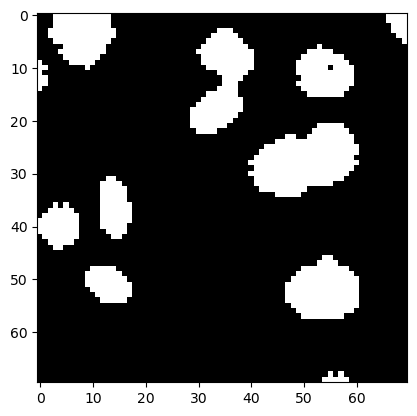

In [33]:
maximum = filters.rank.maximum(minimum.astype(int), morphology.disk(1))
plt.imshow(maximum, cmap='gray')